Name : **Belo Abhigyan**

Course :**MSc Computer Science**

Roll No: **16**

Sem : **Sem-2**

## The given colab file consists of both parts of the 1st Assignment

In [47]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/My Drive/MScML')

Mounted at /content/drive


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

The MAGIC gamma telescope dataset: https://archive.ics.uci.edu/dataset/159/magic+gamma+telescope, it generated to simulate registration of high energy gamma particles in a ground-based atmospheric Cherenkov gamma telescope using the imaging technique allowing to discriminate statistically the information caused by primary gammas (signal) from the images of hadronic showers initiated by cosmic rays in the upper atmosphere (background). It is required to investigate the data deeper, split into train and test data with class labels g = gamma (signal) and h = hadron (background). You are asked to apply preprocessing and feature selection techniques.


1. fLength: continuous # major axis of ellipse [mm]

2. fWidth: continuous # minor axis of ellipse [mm]

3. fSize: continuous # 10-log of sum of content of all pixels [in #phot]

4. fConc: continuous # ratio of sum of two highest pixels over fSize [ratio]

5. fConc1: continuous # ratio of highest pixel over fSize [ratio]

6. fAsym: continuous # distance from highest pixel to center, projected onto major axis [mm]

7. fM3Long: continuous # 3rd root of third moment along major axis [mm]

8. fM3Trans: continuous # 3rd root of third moment along minor axis [mm]

9. fAlpha: continuous # angle of major axis with vector to origin [deg]

10. fDist: continuous # distance from origin to center of ellipse [mm]

class: g,h # gamma (signal), hadron (background)

g = gamma (signal): 12332 h = hadron (background): 6688

In [2]:
!pip install ucimlrepo

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
magicGammaTelescope = fetch_ucirepo(id=159)

# data (as pandas dataframes)
featuresData = magicGammaTelescope.data.features
labelData = magicGammaTelescope.data.targets

# metadata
print(magicGammaTelescope.metadata)

# variable information
print(magicGammaTelescope.variables)

{'uci_id': 159, 'name': 'MAGIC Gamma Telescope', 'repository_url': 'https://archive.ics.uci.edu/dataset/159/magic+gamma+telescope', 'data_url': 'https://archive.ics.uci.edu/static/public/159/data.csv', 'abstract': 'Data are MC generated to simulate registration of high energy gamma particles in an atmospheric Cherenkov telescope', 'area': 'Physics and Chemistry', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 19020, 'num_features': 10, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2004, 'last_updated': 'Tue Dec 19 2023', 'dataset_doi': '10.24432/C52C8B', 'creators': ['R. Bock'], 'intro_paper': None, 'additional_info': {'summary': "The data are MC generated (see below) to simulate registration of high energy gamma particles in a ground-based atmospheric Cherenkov gamma telescope using the imaging technique. Cherenkov gamm

In [4]:
!wget https://archive.ics.uci.edu/static/public/159/data.csv

--2024-02-03 16:48:02--  https://archive.ics.uci.edu/static/public/159/data.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘data.csv’

data.csv                [  <=>               ]   1.43M  4.79MB/s    in 0.3s    

2024-02-03 16:48:03 (4.79 MB/s) - ‘data.csv’ saved [1496488]



In [5]:
print(featuresData.shape)

(19020, 10)


In [6]:
print(labelData.shape)

(19020, 1)


In [7]:
import pandas as pd

df = pd.concat([featuresData,labelData],axis=1)

In [8]:
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [9]:
df["class"] = (df["class"] == "g").astype(int)

In [10]:
df

fLength    fWidth   fSize   fConc  fConc1     fAsym   fM3Long  \
0       28.7967   16.0021  2.6449  0.3918  0.1982   27.7004   22.0110   
1       31.6036   11.7235  2.5185  0.5303  0.3773   26.2722   23.8238   
2      162.0520  136.0310  4.0612  0.0374  0.0187  116.7410  -64.8580   
3       23.8172    9.5728  2.3385  0.6147  0.3922   27.2107   -6.4633   
4       75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277   28.5525   
...         ...       ...     ...     ...     ...       ...       ...   
19015   21.3846   10.9170  2.6161  0.5857  0.3934   15.2618   11.5245   
19016   28.9452    6.7020  2.2672  0.5351  0.2784   37.0816   13.1853   
19017   75.4455   47.5305  3.4483  0.1417  0.0549   -9.3561   41.0562   
19018  120.5135   76.9018  3.9939  0.0944  0.0683    5.8043  -93.5224   
19019  187.1814   53.0014  3.2093  0.2876  0.1539 -167.3125 -168.4558   

       fM3Trans   fAlpha     fDist  class  
0       -8.2027  40.0920   81.8828      1  
1       -9.9574   6.3609  205.2610      1  
2      -45.2160  76.9600  256.7880      1  
3       -7.1513  10.4490  116.7370      1  
4       21.8393   4.6480  356.4620      1  
...         ...      ...       ...    ...  
19015    2.8766   2.4229  106.8258      0  
19016   -2.9632  86.7975  247.4560      0  
19017   -9.4662  30.2987  256.5166      0  
19018  -63.8389  84.6874  408.3166      0  
19019   31.4755  52.7310  272.3174      0  

[19020 rows x 11 columns]

fLength


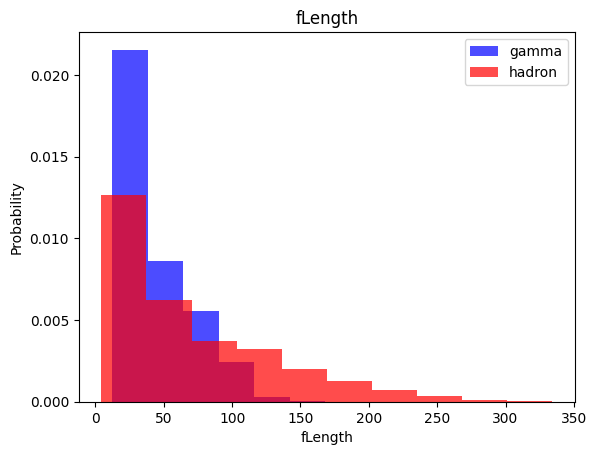

fWidth


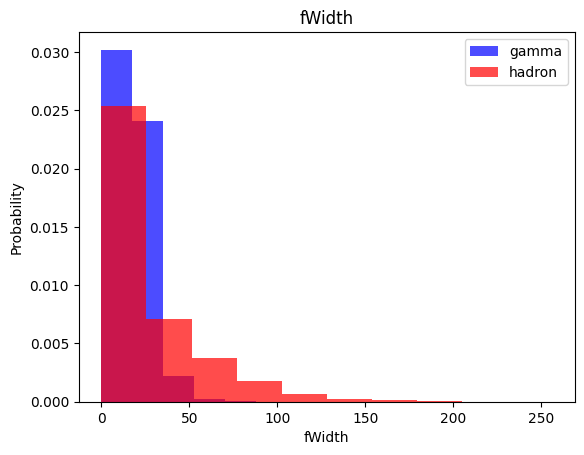

fSize


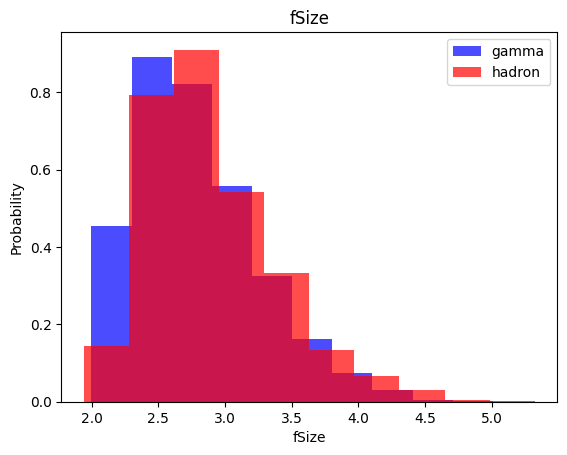

fConc


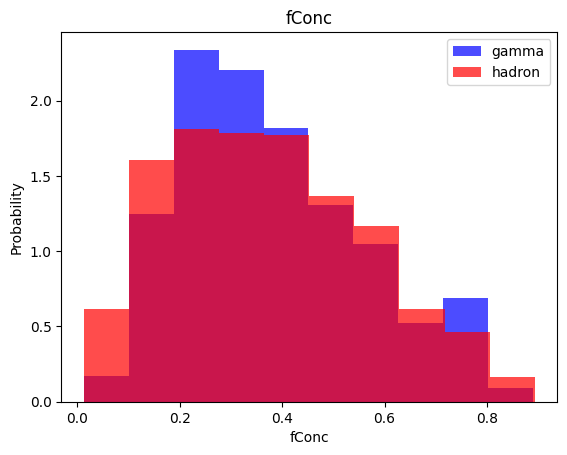

fConc1


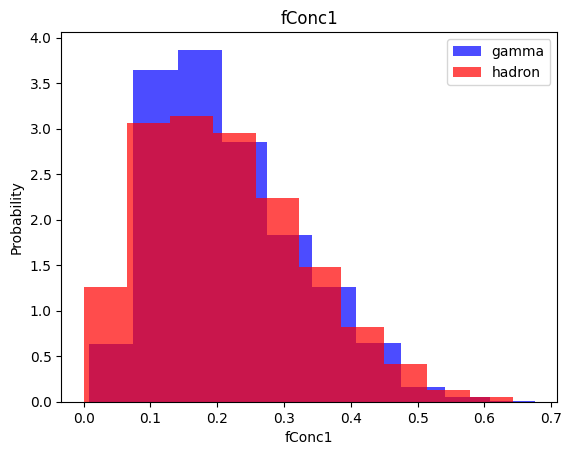

fAsym


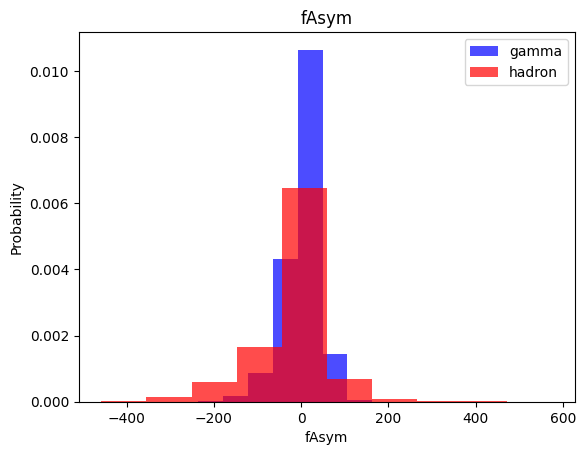

fM3Long


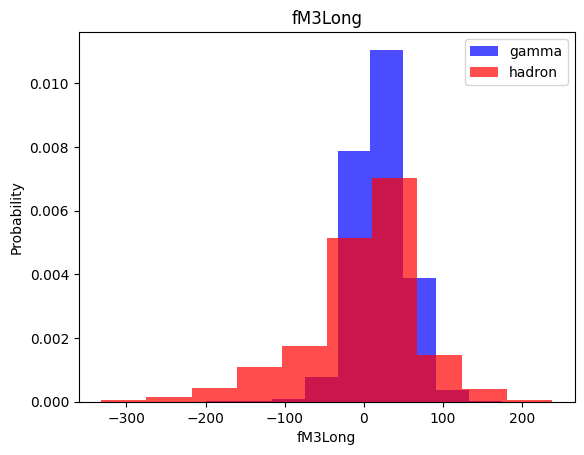

fM3Trans


fAlpha


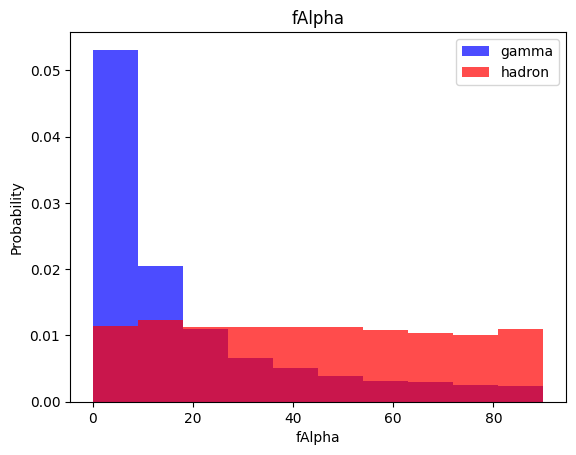

fDist


In [11]:
for feature in df.columns[:-1]:
  print(feature)
  plt.hist(df[df["class"]==1][feature],color='blue',label='gamma',alpha=0.7,density=True)
  plt.hist(df[df["class"]==0][feature],color='red',label='hadron',alpha=0.7,density=True)
  plt.title(feature)
  plt.ylabel("Probability")
  plt.xlabel(feature)
  plt.legend()
  plt.show()

### Train, validation, and test sets

In [12]:
renamedLabel = df.iloc[:,-1]
renamedLabel

0        1
1        1
2        1
3        1
4        1
        ..
19015    0
19016    0
19017    0
19018    0
19019    0
Name: class, Length: 19020, dtype: int64

In [13]:
featuresData

fLength    fWidth   fSize   fConc  fConc1     fAsym   fM3Long  \
0       28.7967   16.0021  2.6449  0.3918  0.1982   27.7004   22.0110   
1       31.6036   11.7235  2.5185  0.5303  0.3773   26.2722   23.8238   
2      162.0520  136.0310  4.0612  0.0374  0.0187  116.7410  -64.8580   
3       23.8172    9.5728  2.3385  0.6147  0.3922   27.2107   -6.4633   
4       75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277   28.5525   
...         ...       ...     ...     ...     ...       ...       ...   
19015   21.3846   10.9170  2.6161  0.5857  0.3934   15.2618   11.5245   
19016   28.9452    6.7020  2.2672  0.5351  0.2784   37.0816   13.1853   
19017   75.4455   47.5305  3.4483  0.1417  0.0549   -9.3561   41.0562   
19018  120.5135   76.9018  3.9939  0.0944  0.0683    5.8043  -93.5224   
19019  187.1814   53.0014  3.2093  0.2876  0.1539 -167.3125 -168.4558   

       fM3Trans   fAlpha     fDist  
0       -8.2027  40.0920   81.8828  
1       -9.9574   6.3609  205.2610  
2      -45.2160  76.9600  256.7880  
3       -7.1513  10.4490  116.7370  
4       21.8393   4.6480  356.4620  
...         ...      ...       ...  
19015    2.8766   2.4229  106.8258  
19016   -2.9632  86.7975  247.4560  
19017   -9.4662  30.2987  256.5166  
19018  -63.8389  84.6874  408.3166  
19019   31.4755  52.7310  272.3174  

[19020 rows x 10 columns]

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(featuresData, renamedLabel, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [15]:
X_train

fLength   fWidth   fSize   fConc  fConc1     fAsym   fM3Long  \
616     25.0822  10.9047  2.5775  0.5212  0.2712   21.7270  -17.8951   
10725   13.1598  10.4453  2.1414  0.7870  0.4874   13.1831    5.6563   
16645   18.4268  10.4534  2.1584  0.5625  0.3090   23.2750    9.8267   
500     17.0875  11.2666  2.2553  0.5667  0.3083    0.7686   -5.2321   
17002  214.9680  52.8938  3.9427  0.0973  0.0508 -113.1400 -243.2760   
...         ...      ...     ...     ...     ...       ...       ...   
3027    45.1020  20.0974  3.1647  0.1930  0.0975   34.5486   31.4351   
2732    27.2726  12.6129  2.7288  0.3978  0.2512  -10.4679  -17.5545   
2100    97.0464  12.2902  2.7214  0.2811  0.1491 -122.3730   84.5137   
8144    19.9527   6.5626  2.2292  0.8201  0.5162   17.6483   16.5275   
10145   21.5493  13.4295  2.5999  0.5176  0.3178   12.8776   -8.3443   

       fM3Trans   fAlpha    fDist  
616     -7.3121   6.2190  180.699  
10725  -10.5963  34.5856  179.096  
16645   -3.2842  73.1980  172.494  
500      4.9075  56.4005  142.859  
17002   19.1703  15.6930  216.928  
...         ...      ...      ...  
3027    -8.0756   1.2698  171.526  
2732    -9.9008   3.7890  185.431  
2100     3.9472  30.2970  231.445  
8144    -5.1195  56.6840  189.301  
10145   11.3953  15.6820  238.771  

[11412 rows x 10 columns]

In [16]:
X_val.shape

(3804, 10)

In [17]:
X_test.shape

(3804, 10)

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
help(scaler.fit)

Help on method fit in module sklearn.preprocessing._data:

fit(X, y=None, sample_weight=None) method of sklearn.preprocessing._data.StandardScaler instance
    Compute the mean and std to be used for later scaling.
    
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        The data used to compute the mean and standard deviation
        used for later scaling along the features axis.
    
    y : None
        Ignored.
    
    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.
    
        .. versionadded:: 0.24
           parameter *sample_weight* support to StandardScaler.
    
    Returns
    -------
    self : object
        Fitted scaler.



In [19]:
from sklearn import tree
from sklearn.metrics import classification_report as cr
classifier = tree.DecisionTreeClassifier()

### 1. Not scaled/ normalized

In [20]:
classifier = classifier.fit(X_train,y_train)

In [21]:
y_pred = classifier.predict(X_test)

In [22]:
print(cr(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.73      0.72      1344
           1       0.85      0.84      0.84      2460

    accuracy                           0.80      3804
   macro avg       0.78      0.78      0.78      3804
weighted avg       0.80      0.80      0.80      3804



### 2. scaled but not oversampled

In [23]:
from sklearn.preprocessing import StandardScaler
def scaleDataset(features, labels):
  X = features.values
  y = labels.values
  scaler = StandardScaler()
  X = scaler.fit_transform (X)
  return X, y

In [24]:
X_trainNormalized, y_trainNormalized = scaleDataset(X_train, y_train)
X_validNormalized, y_validNormalized = scaleDataset(X_val, y_val)
X_testNormalized, y_testNormalized = scaleDataset(X_test, y_test)

In [25]:
classifier = classifier.fit(X_trainNormalized, y_trainNormalized)
y_pred1 = classifier.predict(X_testNormalized)
print(cr(y_testNormalized,y_pred1))

              precision    recall  f1-score   support

           0       0.71      0.72      0.71      1344
           1       0.84      0.84      0.84      2460

    accuracy                           0.80      3804
   macro avg       0.78      0.78      0.78      3804
weighted avg       0.80      0.80      0.80      3804



In [26]:
(y_trainNormalized == 1).sum(), (y_trainNormalized == 0).sum()

(7418, 3994)

### 3. scaled and oversampled

In [27]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
def scaleDataset(features, labels,oversample=False):
  X = features.values
  y = labels.values
  scaler = StandardScaler()
  X = scaler.fit_transform (X)
  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)
  return X, y

In [28]:
X_trainOversampledScaled, y_trainOversampledScaled = scaleDataset(X_train, y_train, oversample=True)
X_validOversampledScaled, y_validOversampledScaled = scaleDataset(X_val, y_val, oversample=False)
X_testOversampledScaled, y_testOversampledScaled = scaleDataset (X_test, y_test, oversample=False)

In [29]:
(y_trainOversampledScaled == 1).sum(), (y_trainOversampledScaled == 0).sum()

(7418, 7418)

In [30]:
classifier = classifier.fit(X_trainOversampledScaled, y_trainOversampledScaled)
y_pred1 = classifier.predict(X_testOversampledScaled)
print(cr(y_testOversampledScaled,y_pred1))

              precision    recall  f1-score   support

           0       0.72      0.71      0.72      1344
           1       0.84      0.85      0.85      2460

    accuracy                           0.80      3804
   macro avg       0.78      0.78      0.78      3804
weighted avg       0.80      0.80      0.80      3804



# ***SpamBase Dataset***

In [32]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
spam_base = fetch_ucirepo(id=94)

# data (as pandas dataframes)
featuresData = spam_base.data.features
labelData = spam_base.data.targets

# metadata
print(spam_base.metadata)

# variable information
print(spam_base.variables)

{'uci_id': 94, 'name': 'Spambase', 'repository_url': 'https://archive.ics.uci.edu/dataset/94/spambase', 'data_url': 'https://archive.ics.uci.edu/static/public/94/data.csv', 'abstract': 'Classifying Email as Spam or Non-Spam', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 4601, 'num_features': 57, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1999, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C53G6X', 'creators': ['Mark Hopkins', 'Erik Reeber', 'George Forman', 'Jaap Suermondt'], 'intro_paper': None, 'additional_info': {'summary': 'The "spam" concept is diverse: advertisements for products/web sites, make money fast schemes, chain letters, pornography...\n\nThe classification task for this dataset is to determine whether a given email is spam or not.\n\t\nOur collecti

In [33]:
!wget https://archive.ics.uci.edu/static/public/94/data.csv

--2024-02-03 16:54:48--  https://archive.ics.uci.edu/static/public/94/data.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘data.csv.1’

data.csv.1              [  <=>               ] 687.36K  2.77MB/s    in 0.2s    

2024-02-03 16:54:48 (2.77 MB/s) - ‘data.csv.1’ saved [703858]



In [34]:
print(featuresData.shape)
print(labelData.shape)

(4601, 57)
(4601, 1)


In [35]:
import pandas as pd

df = pd.concat([featuresData,labelData],axis=1)

In [36]:
df.head()

word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0            0.00               0.64           0.64           0.0   
1            0.21               0.28           0.50           0.0   
2            0.06               0.00           0.71           0.0   
3            0.00               0.00           0.00           0.0   
4            0.00               0.00           0.00           0.0   

   word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0           0.32            0.00              0.00                0.00   
1           0.14            0.28              0.21                0.07   
2           1.23            0.19              0.19                0.12   
3           0.63            0.00              0.31                0.63   
4           0.63            0.00              0.31                0.63   

   word_freq_order  word_freq_mail  ...  char_freq_;  char_freq_(  \
0             0.00            0.00  ...         0.00        0.000   
1             0.00            0.94  ...         0.00        0.132   
2             0.64            0.25  ...         0.01        0.143   
3             0.31            0.63  ...         0.00        0.137   
4             0.31            0.63  ...         0.00        0.135   

   char_freq_[  char_freq_!  char_freq_$  char_freq_#  \
0          0.0        0.778        0.000        0.000   
1          0.0        0.372        0.180        0.048   
2          0.0        0.276        0.184        0.010   
3          0.0        0.137        0.000        0.000   
4          0.0        0.135        0.000        0.000   

   capital_run_length_average  capital_run_length_longest  \
0                       3.756                          61   
1                       5.114                         101   
2                       9.821                         485   
3                       3.537                          40   
4                       3.537                          40   

   capital_run_length_total  Class  
0                       278      1  
1                      1028      1  
2                      2259      1  
3                       191      1  
4                       191      1  

[5 rows x 58 columns]

In [37]:
renamedLabel = df.iloc[:,-1]
renamedLabel

0       1
1       1
2       1
3       1
4       1
       ..
4596    0
4597    0
4598    0
4599    0
4600    0
Name: Class, Length: 4601, dtype: int64

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(featuresData, renamedLabel, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [39]:
X_val.shape

(920, 57)

In [40]:
X_test.shape

(921, 57)

### 1. Not scaled/ normalized

In [41]:
classifier = classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
print(cr(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       531
           1       0.88      0.87      0.88       390

    accuracy                           0.90       921
   macro avg       0.89      0.89      0.89       921
weighted avg       0.90      0.90      0.90       921



### 2. scaled but not oversampled

In [42]:
X_trainNormalized, y_trainNormalized = scaleDataset(X_train, y_train)
X_validNormalized, y_validNormalized = scaleDataset(X_val, y_val)
X_testNormalized, y_testNormalized = scaleDataset(X_test, y_test)

In [43]:
classifier = classifier.fit(X_trainNormalized, y_trainNormalized)
y_pred1 = classifier.predict(X_testNormalized)
print(cr(y_testNormalized,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       531
           1       0.88      0.87      0.88       390

    accuracy                           0.90       921
   macro avg       0.89      0.89      0.89       921
weighted avg       0.90      0.90      0.90       921



### 3. Scaled and oversampled

In [44]:
X_trainOversampledScaled, y_trainOversampledScaled = scaleDataset(X_train, y_train, oversample=True)
X_validOversampledScaled, y_validOversampledScaled = scaleDataset(X_val, y_val, oversample=False)
X_testOversampledScaled, y_testOversampledScaled = scaleDataset (X_test, y_test, oversample=False)

In [45]:
(y_trainOversampledScaled == 1).sum(), (y_trainOversampledScaled == 0).sum()

(1688, 1688)

In [46]:
classifier = classifier.fit(X_trainOversampledScaled, y_trainOversampledScaled)
y_pred1 = classifier.predict(X_testOversampledScaled)
print(cr(y_testOversampledScaled,y_pred1))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90       531
           1       0.90      0.81      0.85       390

    accuracy                           0.88       921
   macro avg       0.88      0.87      0.87       921
weighted avg       0.88      0.88      0.88       921

